$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [3]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [4]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [5]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [6]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [7]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [8]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

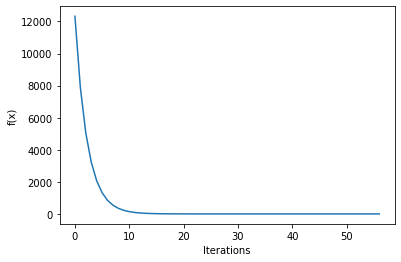

In [9]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

$ \huge{2.}$ \
Minimizer of $f(x)$ is $x_1 = -99.99958844$ and $x_2 = 24.99994388$  \
Minimum function value is $1.7253033717248775e-07$

$ \huge{3.}$ \
The code is written below:

In [10]:
def find_minimizer1(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals, k 

For p =  1
Minimizer: [-99.9553787   24.99391528]  f(x): 0.0020280843668995063 , Number of iterations: 36
For p =  2
Minimizer: [-99.99520882  24.99934666]  f(x): 2.3382220797474075e-05 , Number of iterations: 46
For p =  3
Minimizer: [-99.99958844  24.99994388]  f(x): 1.7253033717248775e-07 , Number of iterations: 57
For p =  4
Minimizer: [-99.99995581  24.99999397]  f(x): 1.989139359193299e-09 , Number of iterations: 67
For p =  5
Minimizer: [-99.99999526  24.99999935]  f(x): 2.293321544605827e-11 , Number of iterations: 77
For p =  6
Minimizer: [-99.99999959  24.99999994]  f(x): 1.6921726745458407e-13 , Number of iterations: 88
For p =  7
Minimizer: [-99.99999996  24.99999999]  f(x): 1.950942200128245e-15 , Number of iterations: 98
For p =  8
Minimizer: [-100.   25.]  f(x): 2.249273021138356e-17 , Number of iterations: 108
For p =  9
Minimizer: [-100.   25.]  f(x): 1.6597088735501767e-19 , Number of iterations: 119
For p =  10
Minimizer: [-100.   25.]  f(x): 1.9135732950098918e-21 ,

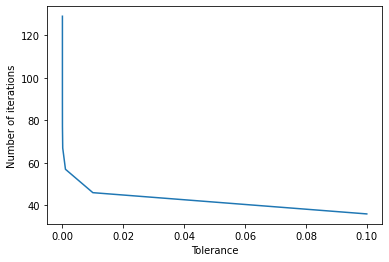

In [11]:
pset=[] 
kset=[]
for p in range(1,11):
  print("For p = ",p)
  pset.append(10**-p)
  my_tol = 10**(-p)
  opt_x, fvals_ret, k = find_minimizer1(my_start_x, my_tol, my_steplength)
  # print("For p = ",p)
  kset.append(k+1)
  print('Minimizer:',opt_x,' f(x):', evalf(opt_x),', Number of iterations:',k+1)
plt.plot(pset,kset)
plt.xlabel('Tolerance')
plt.ylabel('Number of iterations')
plt.show()

**Observations:** We can observe that as tolerance increases, the number of iterations required to reach the optimal value decreases. With decreasing tolerance, we approach closer and closer to the minimizer values.

$ \huge{4.}$ \
The code is written below:

For steplength =  0.0001
Minimizer: [-99.99999505  24.99999932]  f(x): 2.49936770204995e-11 , Number of iterations: 84572
For steplength =  0.001
Minimizer: [-99.99999505  24.99999933]  f(x): 2.494219709847674e-11 , Number of iterations: 8451
For steplength =  0.01
Minimizer: [-99.99999512  24.99999933]  f(x): 2.4304673044883465e-11 , Number of iterations: 839
For steplength =  0.1
Minimizer: [-99.99999526  24.99999935]  f(x): 2.293321544605827e-11 , Number of iterations: 77
For steplength =  0.2
Minimizer: [-99.99999685  24.99999957]  f(x): 1.011747066175869e-11 , Number of iterations: 35
For steplength =  0.4
Minimizer: [-99.99999775  24.99999969]  f(x): 5.169479687800271e-12 , Number of iterations: 12
For steplength =  0.5
Minimizer: [-100.   25.]  f(x): 0.0 , Number of iterations: 2
For steplength =  0.6
Minimizer: [-100.00000225   25.00000031]  f(x): 5.169479687800271e-12 , Number of iterations: 12
For steplength =  0.7
Minimizer: [-100.00000302   25.00000041]  f(x): 9.31250668347

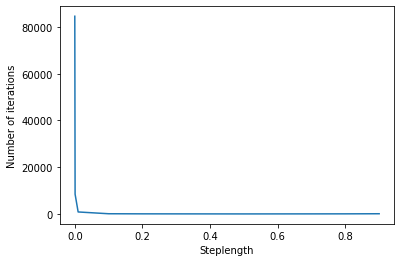

In [14]:
my_steplength=[0.0001,0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9]
kset=[]
slset=[]
my_start_x = np.array([10,10])
my_tol = 10**(-5)
for sl in my_steplength:
  print("For steplength = ",sl)
  opt_x, fvals_ret, k = find_minimizer1(my_start_x, my_tol, sl)
  kset.append(k+1)
  print('Minimizer:',opt_x,' f(x):', evalf(opt_x),', Number of iterations:',k+1)
plt.plot(my_steplength,kset)
plt.xlabel('Steplength')
plt.ylabel('Number of iterations')
plt.show()

**Observations:** An increase in steplength results in a decrease in the number of iterations required to attain the minimum value of $f(x)$ upto a certain value of steplength, which in our set of values, turns out to be $0.5$. From here onwards, the number of iterations required to attain the minimum value of $f(x)$ increases with an increase in steplength.

$ \huge{5.}$ \
The code is written below:

In [13]:
my_start_x=[[10000,10000],[500,0],[0,1000],[1,1],[-500,-2]]
kset=[]
iniset=[]
my_steplength = 0.1
my_tol = 10**(-5)
for x in my_start_x:
  print("For starting x = ",x)
  opt_x, fvals_ret, k = find_minimizer1(np.array(x), my_tol, my_steplength)
  kset.append(k+1)
  print('Optimizer:',opt_x,' f(x):', evalf(opt_x),', Number of iterations:',k+1)
# plt.plot(my_start_x,kset)
# plt.xlabel('Steplength')
# plt.ylabel('Number of iterations')
# plt.show()

For starting x =  [10000, 10000]
Optimizer: [-99.99999679  25.00000317]  f(x): 2.0414342669998657e-11 , Number of iterations: 99
For starting x =  [500, 0]
Optimizer: [-99.99999566  24.99999982]  f(x): 1.888746375147865e-11 , Number of iterations: 85
For starting x =  [0, 1000]
Optimizer: [-99.99999954  25.00000452]  f(x): 2.060780080476227e-11 , Number of iterations: 87
For starting x =  [1, 1]
Optimizer: [-99.99999564  24.99999896]  f(x): 2.0052840841640608e-11 , Number of iterations: 77
For starting x =  [-500, -2]
Optimizer: [-100.00000452   24.99999969]  f(x): 2.055190630073527e-11 , Number of iterations: 83


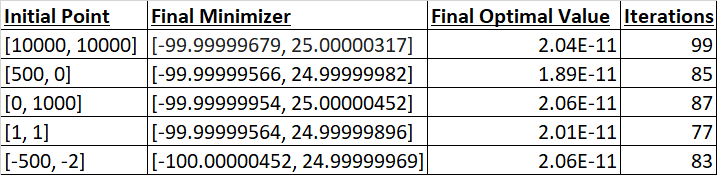

**Observations:** We can see that the choice of our starting point has an impact on the number of iterations that would be required to reach the minimizer and the minimum value for $f(x)$. We know that the minimizer is $(-100,25)$. Now from the list of our provided starting points, the number of iterations required to reach the optimal solution depends on the distance of our starting point from the point $(-100,25)$. As this distance decreases, the number of iterations also decreases.